### imports and setup

In [106]:
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [108]:
from utils import *
from exploration import *

### load data

In [109]:
monthly_data, yearly_data = load_dataset()

### explore data

#### examine monthly data

In [110]:
monthly_data

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag,year,month,average_price_d1,seconds
301,1995-01-01,barking and dagenham,50460,E09000002,96.0,NaN,1,1995,1,0.0,0.0
302,1995-02-01,barking and dagenham,51086,E09000002,95.0,NaN,1,1995,2,626.0,2678400.0
303,1995-03-01,barking and dagenham,51269,E09000002,144.0,NaN,1,1995,3,183.0,5097600.0
304,1995-04-01,barking and dagenham,53134,E09000002,109.0,NaN,1,1995,4,1865.0,7776000.0
305,1995-05-01,barking and dagenham,53042,E09000002,149.0,NaN,1,1995,5,-92.0,10368000.0
...,...,...,...,...,...,...,...,...,...,...,...
11438,2019-09-01,yorkshire and the humber,165362,E12000003,6567.0,NaN,0,2019,9,-342.0,778377600.0
11439,2019-10-01,yorkshire and the humber,166669,E12000003,7163.0,NaN,0,2019,10,1307.0,780969600.0
11440,2019-11-01,yorkshire and the humber,164530,E12000003,7117.0,NaN,0,2019,11,-2139.0,783648000.0
11441,2019-12-01,yorkshire and the humber,166932,E12000003,NaN,NaN,0,2019,12,2402.0,786240000.0


In [111]:
monthly_data[monthly_data.borough_flag == 0].area.unique()

array(['east midlands', 'east of england', 'england', 'inner london',
       'london', 'north east', 'north west', 'outer london', 'south east',
       'south west', 'west midlands', 'yorkshire and the humber'],
      dtype=object)

In [112]:
monthly_data[monthly_data.borough_flag == 1].area.unique()

array(['barking and dagenham', 'barnet', 'bexley', 'brent', 'bromley',
       'camden', 'city of london', 'croydon', 'ealing', 'enfield',
       'greenwich', 'hackney', 'hammersmith and fulham', 'haringey',
       'harrow', 'havering', 'hillingdon', 'hounslow', 'islington',
       'kensington and chelsea', 'kingston upon thames', 'lambeth',
       'lewisham', 'merton', 'newham', 'redbridge',
       'richmond upon thames', 'southwark', 'sutton', 'tower hamlets',
       'waltham forest', 'wandsworth', 'westminster'], dtype=object)

In [113]:
monthly_data.date.unique()

array(['1995-01-01T00:00:00.000000000', '1995-02-01T00:00:00.000000000',
       '1995-03-01T00:00:00.000000000', '1995-04-01T00:00:00.000000000',
       '1995-05-01T00:00:00.000000000', '1995-06-01T00:00:00.000000000',
       '1995-07-01T00:00:00.000000000', '1995-08-01T00:00:00.000000000',
       '1995-09-01T00:00:00.000000000', '1995-10-01T00:00:00.000000000',
       '1995-11-01T00:00:00.000000000', '1995-12-01T00:00:00.000000000',
       '1996-01-01T00:00:00.000000000', '1996-02-01T00:00:00.000000000',
       '1996-03-01T00:00:00.000000000', '1996-04-01T00:00:00.000000000',
       '1996-05-01T00:00:00.000000000', '1996-06-01T00:00:00.000000000',
       '1996-07-01T00:00:00.000000000', '1996-08-01T00:00:00.000000000',
       '1996-09-01T00:00:00.000000000', '1996-10-01T00:00:00.000000000',
       '1996-11-01T00:00:00.000000000', '1996-12-01T00:00:00.000000000',
       '1997-01-01T00:00:00.000000000', '1997-02-01T00:00:00.000000000',
       '1997-03-01T00:00:00.000000000', '1997-04-01

In [114]:
monthly_data.date.unique().shape

(301,)

In [115]:
301 // 12


25

In [116]:
301 % 12

1

plot timeseries for overall price trends

In [117]:
monthly_data.date.unique()[0]

numpy.datetime64('1995-01-01T00:00:00.000000000')

In [118]:
[
    monthly_data[monthly_data.date == monthly_data.date.unique()
                 [i]].average_price.sum()
    for i in range(len(monthly_data.date.unique()))
]


[3382098,
 3366205,
 3361630,
 3368298,
 3400421,
 3437147,
 3470732,
 3469857,
 3447667,
 3426080,
 3415332,
 3429860,
 3420591,
 3577418,
 3446426,
 3498854,
 3512972,
 3550363,
 3571060,
 3609949,
 3624792,
 3620842,
 3646187,
 3670945,
 3730982,
 3773280,
 3817642,
 3866532,
 3942935,
 4010654,
 4090074,
 4134502,
 4199907,
 4227797,
 4283050,
 4316554,
 4364362,
 4398492,
 4441249,
 4674069,
 4547458,
 4591716,
 4641572,
 4687290,
 4705909,
 4703935,
 4691722,
 4699140,
 4724415,
 4761864,
 4816434,
 4889924,
 4965671,
 5049843,
 5138162,
 5254401,
 5398103,
 5473801,
 5579763,
 5645952,
 5744188,
 5831508,
 5926284,
 6099704,
 6201547,
 6340131,
 6439786,
 6535934,
 6580786,
 6564940,
 6655749,
 6668342,
 6702190,
 6630922,
 6683728,
 6767752,
 6887755,
 7013861,
 7131861,
 7253358,
 7303321,
 7372044,
 7469350,
 7527330,
 7549013,
 7532927,
 7588785,
 7730867,
 7913706,
 8137726,
 8336237,
 8507855,
 8637641,
 8719880,
 8841148,
 8887210,
 8987298,
 8999408,
 9048596,
 9080206,


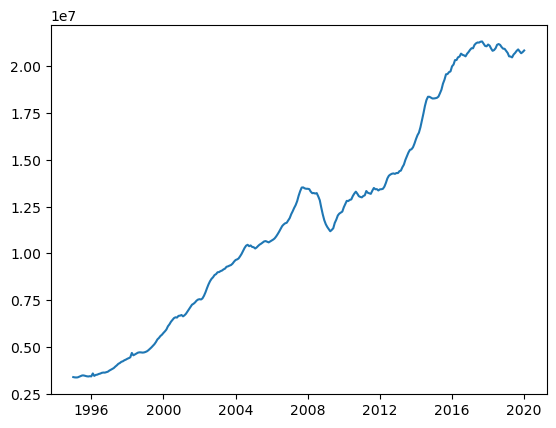

In [119]:
plt.plot(monthly_data.date.unique(), [
    monthly_data[monthly_data.date == monthly_data.date.unique()
                 [i]].average_price.sum()
    for i in range(len(monthly_data.date.unique()))
])


/Users/h.lu/Documents/_academic/_MATH462/math462_project/scripts/exploration.py:13: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


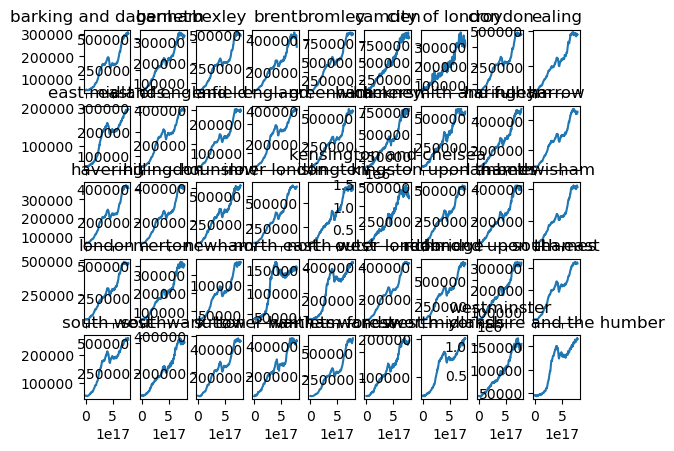

In [120]:
plot_var(monthly_data, "average_price")

visualize aggregate number of crimes committed by month

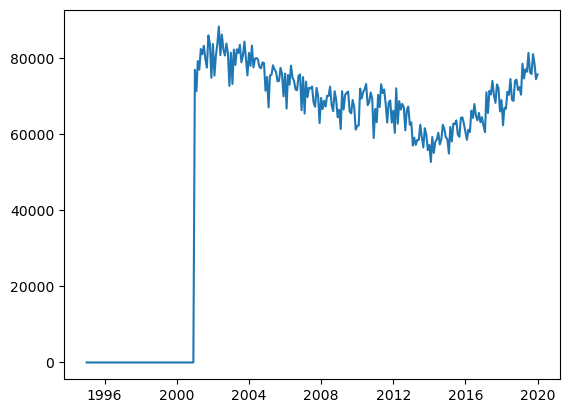

In [121]:
plt.plot(monthly_data.date.unique(), [
    monthly_data[monthly_data.date == monthly_data.date.unique()
                 [i]].no_of_crimes.sum()
    for i in range(len(monthly_data.date.unique()))
])


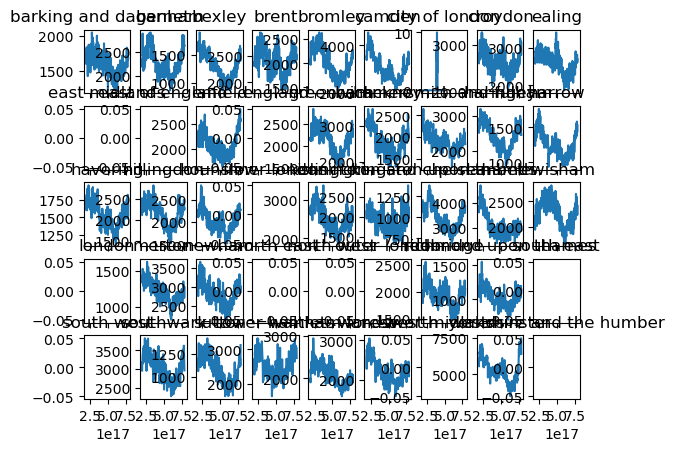

KeyboardInterrupt: 

In [122]:
plot_var(monthly_data, "no_of_crimes")

#### examine yearly data

In [ ]:
yearly_data

,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag,year,month,seconds
1,E09000002,barking and dagenham,1999-12-01,21480.0,NaN,23620,3,162444.0,NaN,NaN,NaN,1,1999,12,155088000.0
52,E09000002,barking and dagenham,2000-12-01,22618.0,NaN,24696,4,163893.0,57000.0,NaN,NaN,1,2000,12,186710400.0
103,E09000002,barking and dagenham,2001-12-01,22323.0,NaN,26050,3,165654.0,54000.0,3780.0,68298.0,1,2001,12,218246400.0
154,E09000002,barking and dagenham,2002-12-01,24813.0,NaN,26653,3,166357.0,52000.0,3780.0,68526.0,1,2002,12,249782400.0
205,E09000002,barking and dagenham,2003-12-01,25358.0,NaN,27792,5,166210.0,55000.0,3780.0,68837.0,1,2003,12,281318400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,E12000003,yorkshire and the humber,2015-12-01,25194.0,7.65,29371,44,5390576.0,2694000.0,NaN,NaN,0,2015,12,660009600.0
902,E12000003,yorkshire and the humber,2016-12-01,25946.0,7.69,29811,43,5425741.0,2735000.0,NaN,NaN,0,2016,12,691632000.0
953,E12000003,yorkshire and the humber,2017-12-01,26309.0,7.66,30484,42,NaN,2759000.0,NaN,NaN,0,2017,12,723168000.0
1004,E12000003,yorkshire and the humber,2018-12-01,26892.0,7.70,31719,43,NaN,2773000.0,NaN,NaN,0,2018,12,754704000.0


In [ ]:
yearly_data.loc[(yearly_data.year == 2000) & (
    yearly_data.area == 'barking and dagenham')]["median_salary"].values


array([22618.])

In [ ]:
monthly_data.loc[(monthly_data.year == 1995) &
                 (monthly_data.area == 'barking and dagenham'),
                 'new_col_delete'] = 10
monthly_data.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag,year,month,average_price_d1,seconds,new_col_delete
301,1995-01-01,barking and dagenham,50460,E09000002,96.0,NaN,1,1995,1,0.0,0.0,10.0
302,1995-02-01,barking and dagenham,51086,E09000002,95.0,NaN,1,1995,2,626.0,2678400.0,10.0
303,1995-03-01,barking and dagenham,51269,E09000002,144.0,NaN,1,1995,3,183.0,5097600.0,10.0
304,1995-04-01,barking and dagenham,53134,E09000002,109.0,NaN,1,1995,4,1865.0,7776000.0,10.0
305,1995-05-01,barking and dagenham,53042,E09000002,149.0,NaN,1,1995,5,-92.0,10368000.0,10.0


In [ ]:
np.datetime64('1999-12-01')

numpy.datetime64('1999-12-01')

In [151]:
dfs = []
for a in yearly_data.area.unique():
    if a not in monthly_data.area.unique():
        continue

    print(a)
    interpolated_df = get_area(yearly_data, a).copy()
    interpolated_df = interpolated_df[[
        'date','median_salary', 'life_satisfaction', 'mean_salary',
        'recycling_pct', 'population_size', 'number_of_jobs', 'area_size',
        'no_of_houses'
    ]].resample('M', on='date').mean(numeric_only=True)
    interpolated_df = interpolated_df.interpolate()
    interpolated_df['area'] = a
    cols = ['area'] + interpolated_df.columns.tolist()[:-1]
    interpolated_df = interpolated_df[cols]
    print(interpolated_df)
    dfs.append(interpolated_df)
yearly_interpolated = pd.concat(dfs)
yearly_interpolated.head(243)


barking and dagenham
                            area  median_salary  life_satisfaction  \
date                                                                 
1999-12-31  barking and dagenham   21480.000000                NaN   
2000-01-31  barking and dagenham   21574.833333                NaN   
2000-02-29  barking and dagenham   21669.666667                NaN   
2000-03-31  barking and dagenham   21764.500000                NaN   
2000-04-30  barking and dagenham   21859.333333                NaN   
...                          ...            ...                ...   
2019-08-31  barking and dagenham   29157.000000               7.52   
2019-09-30  barking and dagenham   29052.250000               7.52   
2019-10-31  barking and dagenham   28947.500000               7.52   
2019-11-30  barking and dagenham   28842.750000               7.52   
2019-12-31  barking and dagenham   28738.000000               7.52   

            population_size  number_of_jobs  area_size  no_of_houses

,area,median_salary,life_satisfaction,population_size,number_of_jobs,area_size,no_of_houses
date,,,,,,,
1999-12-31,barking and dagenham,21480.000000,NaN,162444.000000,NaN,NaN,NaN
2000-01-31,barking and dagenham,21574.833333,NaN,162564.750000,NaN,NaN,NaN
2000-02-29,barking and dagenham,21669.666667,NaN,162685.500000,NaN,NaN,NaN
2000-03-31,barking and dagenham,21764.500000,NaN,162806.250000,NaN,NaN,NaN
2000-04-30,barking and dagenham,21859.333333,NaN,162927.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-10-31,barking and dagenham,28947.500000,7.52,211998.000000,66000.0,3780.0,74923.0
2019-11-30,barking and dagenham,28842.750000,7.52,211998.000000,66000.0,3780.0,74923.0
2019-12-31,barking and dagenham,28738.000000,7.52,211998.000000,66000.0,3780.0,74923.0


In [133]:
a = 'barking and dagenham'

test_df = yearly_data.loc[yearly_data.area == a, [
    'date', 'area', 'population_size', 'mean_salary', 'median_salary'
]]  #.resample(
# 'M', on='date').mean(numeric_only=True)
# test_df
test_df.resample('M', on='date').mean(numeric_only=True).interpolate()


,population_size,median_salary
date,,
1999-12-31,162444.00,21480.000000
2000-01-31,162564.75,21574.833333
2000-02-29,162685.50,21669.666667
2000-03-31,162806.25,21764.500000
2000-04-30,162927.00,21859.333333
...,...,...
2019-08-31,211998.00,29157.000000
2019-09-30,211998.00,29052.250000
2019-10-31,211998.00,28947.500000


why doesnt resampling ever work for mean_salary??

In [99]:
a = 'barking and dagenham'
# test_df = yearly_data.loc[:, ['date', 'area', 'population_size']].groupby('area').resample(
#     'M', on='date').mean(numeric_only=True)
test_df = yearly_data.loc[
    yearly_data.area == a,
    ['date', 'area', 'population_size', 'mean_salary']].groupby(
        'area').resample('M', on='date').mean(numeric_only=True)

test_df = test_df.interpolate()
# test_df['population_size'] = test_df['population_size'].interpolate()
# for col in test_df.columns:
#     if col in ['year',
#        'month', 'seconds']:
#         pass
#     else:
#         test_df[col] = test_df[col].interpolate()
test_df.head(245)
# .month.interpolate()

population_size
area                 date                       
barking and dagenham 1999-12-31        162444.00
                     2000-01-31        162564.75
                     2000-02-29        162685.50
                     2000-03-31        162806.25
                     2000-04-30        162927.00
...                                          ...
                     2019-08-31        211998.00
                     2019-09-30        211998.00
                     2019-10-31        211998.00
                     2019-11-30        211998.00
                     2019-12-31        211998.00

[241 rows x 1 columns]

In [25]:
monthly_resampled = clean_load_dataset(
    '../dataset/housing_in_london_yearly_variables_resampled_2.csv')

In [26]:
monthly_data[(monthly_data.area == 'barking and dagenham')
             & (monthly_data.year >= 2000) & (monthly_data.year <= 2003)]


,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag,year,month,average_price_d1,seconds,new_col_delete
361,2000-01-01,barking and dagenham,71079,E09000002,182.0,NaN,1,2000,1,2267.0,157766400.0,NaN
362,2000-02-01,barking and dagenham,72633,E09000002,191.0,NaN,1,2000,2,1554.0,160444800.0,NaN
363,2000-03-01,barking and dagenham,73624,E09000002,216.0,NaN,1,2000,3,991.0,162950400.0,NaN
364,2000-04-01,barking and dagenham,73800,E09000002,214.0,NaN,1,2000,4,176.0,165628800.0,NaN
365,2000-05-01,barking and dagenham,75126,E09000002,240.0,NaN,1,2000,5,1326.0,168220800.0,NaN
366,2000-06-01,barking and dagenham,76939,E09000002,294.0,NaN,1,2000,6,1813.0,170899200.0,NaN
367,2000-07-01,barking and dagenham,78869,E09000002,305.0,NaN,1,2000,7,1930.0,173491200.0,NaN
368,2000-08-01,barking and dagenham,80150,E09000002,240.0,NaN,1,2000,8,1281.0,176169600.0,NaN
369,2000-09-01,barking and dagenham,81761,E09000002,223.0,NaN,1,2000,9,1611.0,178848000.0,NaN
370,2000-10-01,barking and dagenham,82501,E09000002,196.0,NaN,1,2000,10,740.0,181440000.0,NaN


In [27]:
monthly_resampled[(monthly_resampled.area == 'barking and dagenham')
                  & (monthly_resampled.year >= 2000) &
                  (monthly_resampled.year <= 2003)].shape
# monthly_resampled[monthly_resampled.area == 'barking and dagenham']

(48, 12)

### integrate yearly data into monthly dataset

In [28]:
yearly_resampled = clean_load_dataset(
    "../dataset/housing_in_london_yearly_variables_resampled.csv")
yearly_resampled

,Unnamed: 0,area,date,median_salary,life_satisfaction,population_size,number_of_jobs,area_size,no_of_houses,borough_flag,year,month
0,0,barking and dagenham,1999-12-31,21480.00000,NaN,162444.00,NaN,NaN,NaN,1,1999,12
1,1,barking and dagenham,2000-01-31,21574.83333,NaN,162564.75,NaN,NaN,NaN,1,2000,1
2,2,barking and dagenham,2000-02-29,21669.66667,NaN,162685.50,NaN,NaN,NaN,1,2000,2
3,3,barking and dagenham,2000-03-31,21764.50000,NaN,162806.25,NaN,NaN,NaN,1,2000,3
4,4,barking and dagenham,2000-04-30,21859.33333,NaN,162927.00,NaN,NaN,NaN,1,2000,4
...,...,...,...,...,...,...,...,...,...,...,...,...
12286,12286,yorkshire and the humber,2019-08-31,27520.66667,7.7,5425741.00,2773000.0,2203.0,124509.0,0,2019,8
12287,12287,yorkshire and the humber,2019-09-30,27599.25000,7.7,5425741.00,2773000.0,2203.0,124509.0,0,2019,9
12288,12288,yorkshire and the humber,2019-10-31,27677.83333,7.7,5425741.00,2773000.0,2203.0,124509.0,0,2019,10
12289,12289,yorkshire and the humber,2019-11-30,27756.41667,7.7,5425741.00,2773000.0,2203.0,124509.0,0,2019,11


In [29]:
df = monthly_data.copy()
for col in [
        'median_salary', 'life_satisfaction', 'population_size',
        'number_of_jobs', 'area_size', 'no_of_houses'
]:
    df = interpolate_yearly(df, yearly_resampled, col=col)

In [30]:
df[df.year >= 2002]

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag,year,month,average_price_d1,seconds,new_col_delete,median_salary,life_satisfaction,population_size,number_of_jobs,area_size,no_of_houses
385,2002-01-01,barking and dagenham,98713,E09000002,216.0,1751.0,1,2002,1,2001.0,220924800.0,NaN,22530.50000,NaN,1.657126e+05,5.383333e+04,3780.0,68317.0
386,2002-02-01,barking and dagenham,100229,E09000002,198.0,1529.0,1,2002,2,1516.0,223603200.0,NaN,22738.00000,NaN,1.657712e+05,5.366667e+04,3780.0,68336.0
387,2002-03-01,barking and dagenham,101633,E09000002,261.0,1626.0,1,2002,3,1404.0,226022400.0,NaN,22945.50000,NaN,1.658298e+05,5.350000e+04,3780.0,68355.0
388,2002-04-01,barking and dagenham,103885,E09000002,285.0,1685.0,1,2002,4,2252.0,228700800.0,NaN,23153.00000,NaN,1.658883e+05,5.333333e+04,3780.0,68374.0
389,2002-05-01,barking and dagenham,105761,E09000002,335.0,1872.0,1,2002,5,1876.0,231292800.0,NaN,23360.50000,NaN,1.659469e+05,5.316667e+04,3780.0,68393.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11438,2019-09-01,yorkshire and the humber,165362,E12000003,6567.0,NaN,0,2019,9,-342.0,778377600.0,NaN,27599.25000,7.7,5.425741e+06,2.773000e+06,2203.0,124509.0
11439,2019-10-01,yorkshire and the humber,166669,E12000003,7163.0,NaN,0,2019,10,1307.0,780969600.0,NaN,27677.83333,7.7,5.425741e+06,2.773000e+06,2203.0,124509.0
11440,2019-11-01,yorkshire and the humber,164530,E12000003,7117.0,NaN,0,2019,11,-2139.0,783648000.0,NaN,27756.41667,7.7,5.425741e+06,2.773000e+06,2203.0,124509.0
11441,2019-12-01,yorkshire and the humber,166932,E12000003,NaN,NaN,0,2019,12,2402.0,786240000.0,NaN,27835.00000,7.7,5.425741e+06,2.773000e+06,2203.0,124509.0


### check utils function

In [271]:
monthly_interpolated_data = load_interpolated_data()
monthly_data, yearly_data = load_dataset()

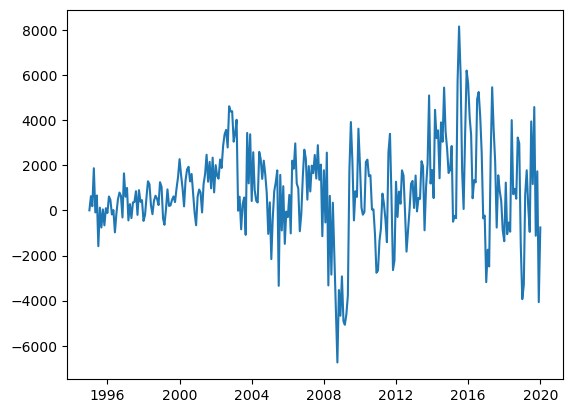

In [272]:
# plot deltas between each data point
a = 'barking and dagenham'
plt.plot(monthly_interpolated_data.loc[monthly_interpolated_data.area == a,
                                       'date'], monthly_interpolated_data.loc[monthly_interpolated_data.area == a,
                                       'average_price_d1'])


Text(0.5, 1.0, 'monthly interpolated data in barking and dagenham for number_of_jobs')

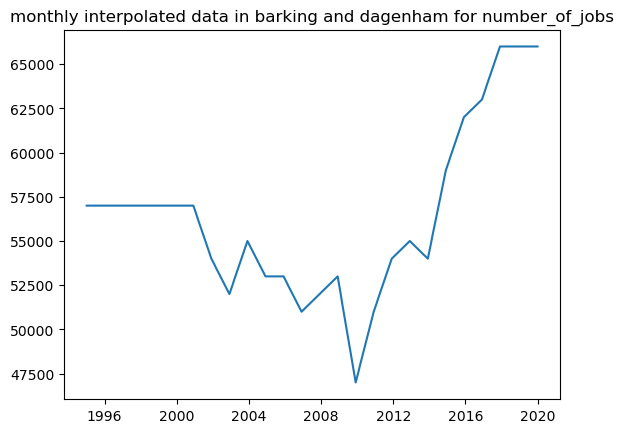

In [273]:
# plot interpolated data
a = 'barking and dagenham'
col = 'number_of_jobs'
freq = 'monthly interpolated'
plt.plot(monthly_interpolated_data.loc[monthly_interpolated_data.area == a,
                                       'date'], monthly_interpolated_data.loc[monthly_interpolated_data.area == a,
                                       col])
plt.title(f'{freq} data in {a} for {col}')

In [274]:
monthly_interpolated_data.loc[monthly_interpolated_data.area == a,
                                       ['date', col]]

,date,number_of_jobs
301,1995-01-01,57000.0
302,1995-02-01,57000.0
303,1995-03-01,57000.0
304,1995-04-01,57000.0
305,1995-05-01,57000.0
...,...,...
597,2019-09-01,66000.0
598,2019-10-01,66000.0
599,2019-11-01,66000.0
600,2019-12-01,66000.0


Text(0.5, 1.0, 'yearly data in barking and dagenham for number_of_jobs')

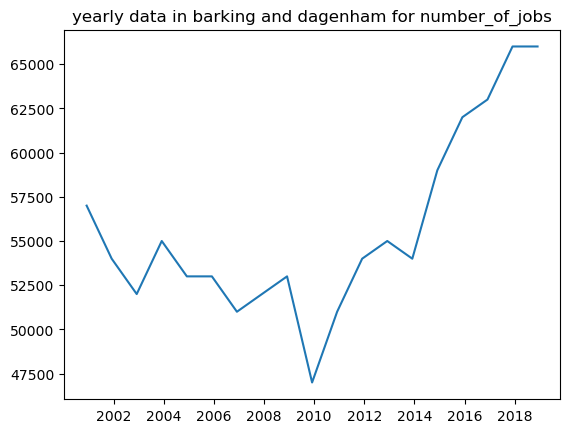

In [275]:
# plot interpolated data
a = 'barking and dagenham'
col = 'number_of_jobs'
freq = 'yearly'
plt.plot(yearly_data.loc[yearly_data.area == a,
                                       'date'], yearly_data.loc[yearly_data.area == a,
                                       col])
plt.title(f'{freq} data in {a} for {col}')

Text(0.5, 1.0, 'monthly interpolated data in barking and dagenham for median_salary')

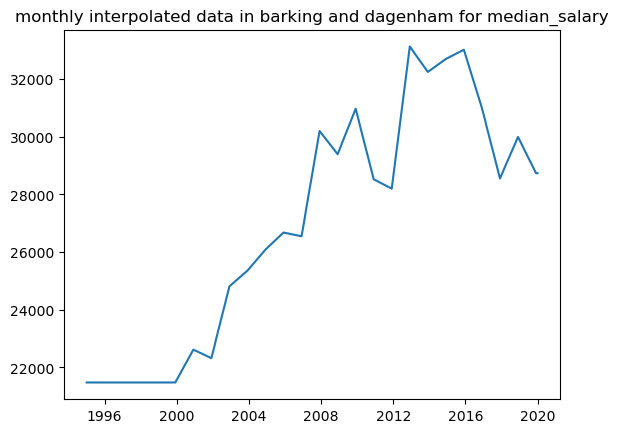

In [276]:
# plot interpolated data
a = 'barking and dagenham'
col = 'median_salary'
freq = 'monthly interpolated'
plt.plot(monthly_interpolated_data.loc[monthly_interpolated_data.area == a,
                                       'date'], monthly_interpolated_data.loc[monthly_interpolated_data.area == a,
                                       col])
plt.title(f'{freq} data in {a} for {col}')

Text(0.5, 1.0, 'yearly data in barking and dagenham for median_salary')

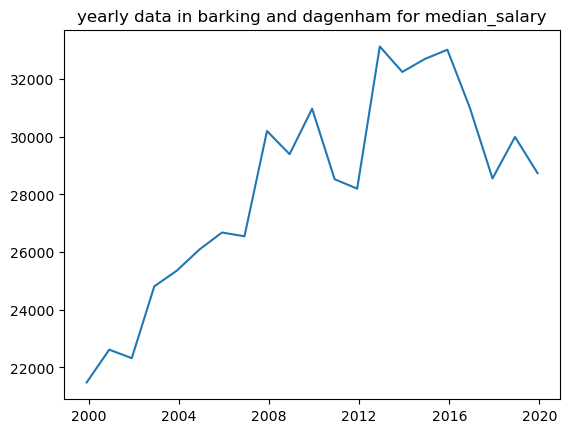

In [277]:
# plot interpolated data
a = 'barking and dagenham'
col = 'median_salary'
freq = 'yearly'
plt.plot(yearly_data.loc[yearly_data.area == a,
                                       'date'], yearly_data.loc[yearly_data.area == a,
                                       col])
plt.title(f'{freq} data in {a} for {col}')

Text(0.5, 1.0, 'monthly interpolated data in barking and dagenham for life_satisfaction')

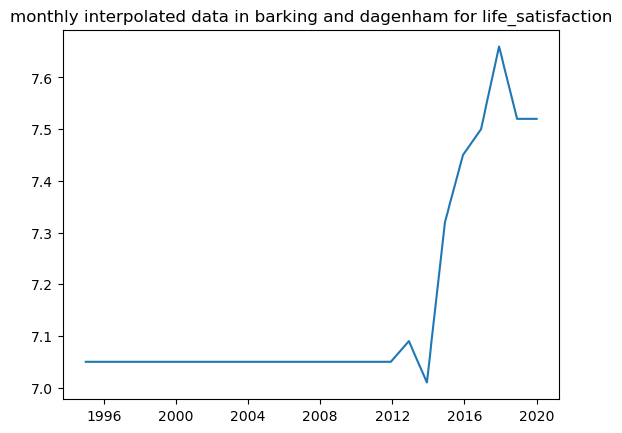

In [278]:
# plot interpolated data
a = 'barking and dagenham'
col = 'life_satisfaction'
freq = 'monthly interpolated'
plt.plot(monthly_interpolated_data.loc[monthly_interpolated_data.area == a,
                                       'date'], monthly_interpolated_data.loc[monthly_interpolated_data.area == a,
                                       col])
plt.title(f'{freq} data in {a} for {col}')

Text(0.5, 1.0, 'yearly data in barking and dagenham for life_satisfaction')

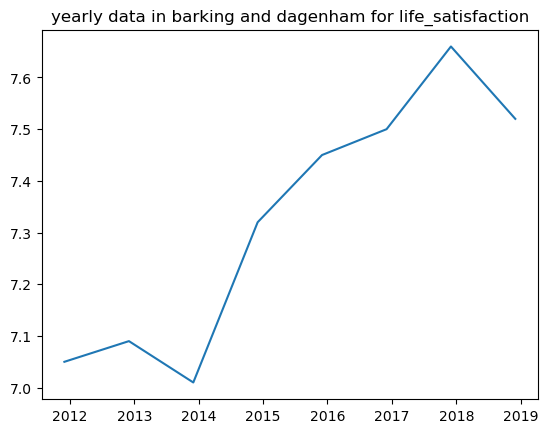

In [279]:
# plot interpolated data
a = 'barking and dagenham'
col = 'life_satisfaction'
freq = 'yearly'
plt.plot(yearly_data.loc[yearly_data.area == a,
                                       'date'], yearly_data.loc[yearly_data.area == a,
                                       col])
plt.title(f'{freq} data in {a} for {col}')

Text(0.5, 1.0, 'monthly interpolated data in barking and dagenham for population_size')

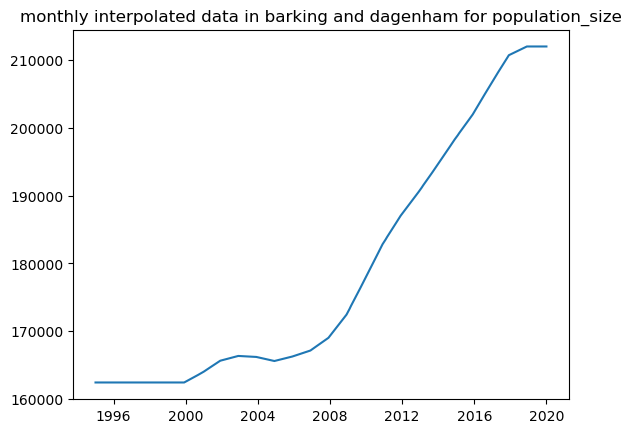

In [280]:
# plot interpolated data
a = 'barking and dagenham'
col = 'population_size'
freq = 'monthly interpolated'
plt.plot(monthly_interpolated_data.loc[monthly_interpolated_data.area == a,
                                       'date'], monthly_interpolated_data.loc[monthly_interpolated_data.area == a,
                                       col])
plt.title(f'{freq} data in {a} for {col}')

Text(0.5, 1.0, 'yearly data in barking and dagenham for population_size')

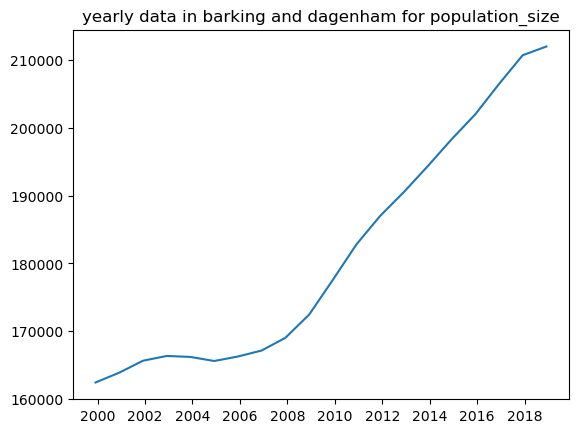

In [281]:
# plot interpolated data
a = 'barking and dagenham'
col = 'population_size'
freq = 'yearly'
plt.plot(yearly_data.loc[yearly_data.area == a,
                                       'date'], yearly_data.loc[yearly_data.area == a,
                                       col])
plt.title(f'{freq} data in {a} for {col}')

Text(0.5, 1.0, 'yearly data in england for area_size')

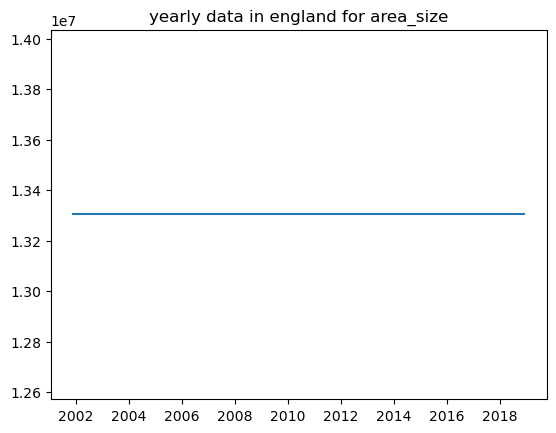

In [282]:
# plot interpolated data
a = 'england'
col = 'area_size'
freq = 'yearly'
plt.plot(yearly_data.loc[yearly_data.area == a,
                                       'date'], yearly_data.loc[yearly_data.area == a,
                                       col])
plt.title(f'{freq} data in {a} for {col}')

In [283]:
# TODO: make scatterplots btwn price and other vars

### check autocorrelation

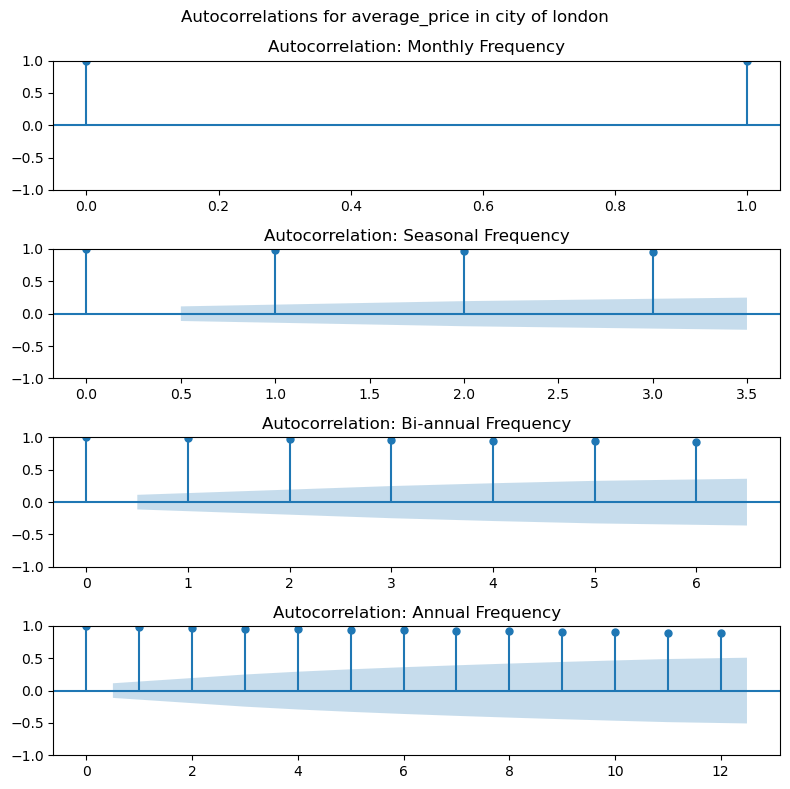

In [284]:
lags = [
    1,  # monthly
    3,  # seasonally
    6,  # bi-annually
    12  # annually
]
# lags = [3 * samples_per_hour, samples_per_day, samples_per_week]
titles = [
    'Autocorrelation: Monthly Frequency', 'Autocorrelation: Seasonal Frequency',
    'Autocorrelation: Bi-annual Frequency', 'Autocorrelation: Annual Frequency'
]

area = "city of london"
col = 'average_price'
suptitle = f'Autocorrelations for {col} in {area}'
plot_multi_acf(get_area(monthly_data, area)[col], lags, titles, suptitle)


so we see that there is a lot of autocorrelation within our data. let's see what the autocorrelation looks like for our differenced data.

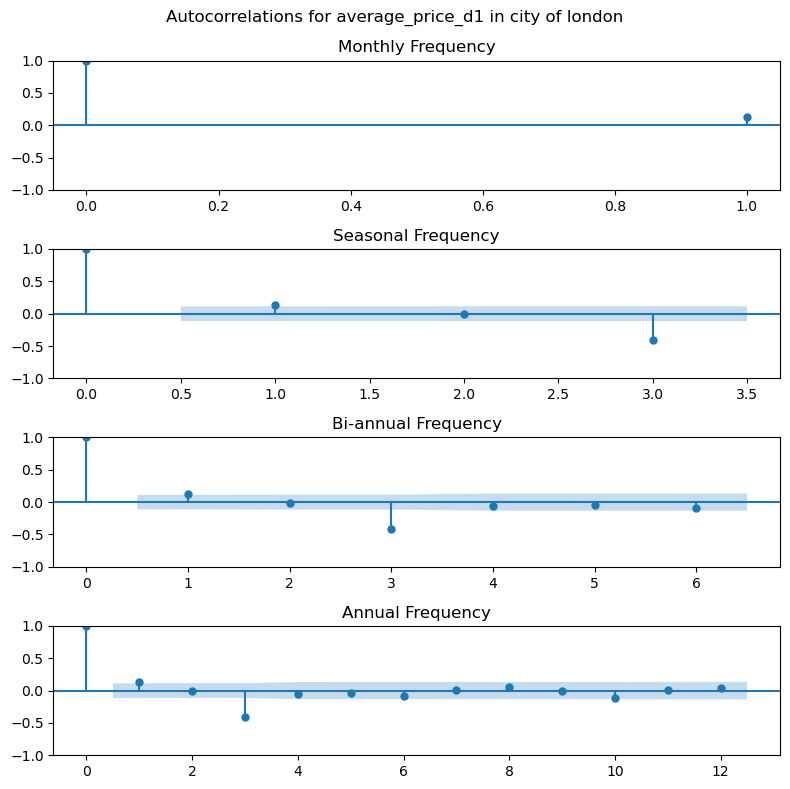

In [285]:
lags = [
    1,  # monthly
    3,  # seasonally
    6,  # bi-annually
    12  # annually
]
# lags = [3 * samples_per_hour, samples_per_day, samples_per_week]
titles = [
    'Monthly Frequency', 'Seasonal Frequency', 'Bi-annual Frequency',
    'Annual Frequency'
]

area = "city of london"
col = 'average_price_d1'
suptitle = f'Autocorrelations for {col} in {area}'
plot_multi_acf(get_area(monthly_data, area)[col], lags, titles, suptitle)


ok, the autocorrelation isn't quite 0, but its a lot smaller now, which is better. 